In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#df = pd.read_csv("football_players_dataset.csv")
url= "https://raw.githubusercontent.com/ShilpaSayuraML/DS-ML-Workshop/main/Extra/epldata_final.csv"
df = pd.read_csv(url)

# Display basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB
None


In [2]:
df

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1


In [3]:

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              age  position_cat  market_value   page_views   fpl_value  \
count  461.000000    461.000000    461.000000   461.000000  461.000000   
mean    26.804772      2.180043     11.012039   763.776573    5.447939   
std      3.961892      1.000061     12.257403   931.805757    1.346695   
min     17.000000      1.000000      0.050000     3.000000    4.000000   
25%     24.000000      1.000000      3.000000   220.000000    4.500000   
50%     27.000000      2.000000      7.000000   460.000000    5.000000   
75%     30.000000      3.000000     15.000000   896.000000    5.500000   
max     38.000000      4.000000     75.000000  7664.000000   12.500000   

       fpl_points      region  new_foreign     age_cat     club_id  \
count  461.000000  460.000000   461.000000  461.000000  461.000000   
mean    57.314534    1.993478     0.034707    3.206074   10.334056   
std     53.113811    0.957689     0.183236    1.279795    5.726475   
min      0.000000    1.000000   

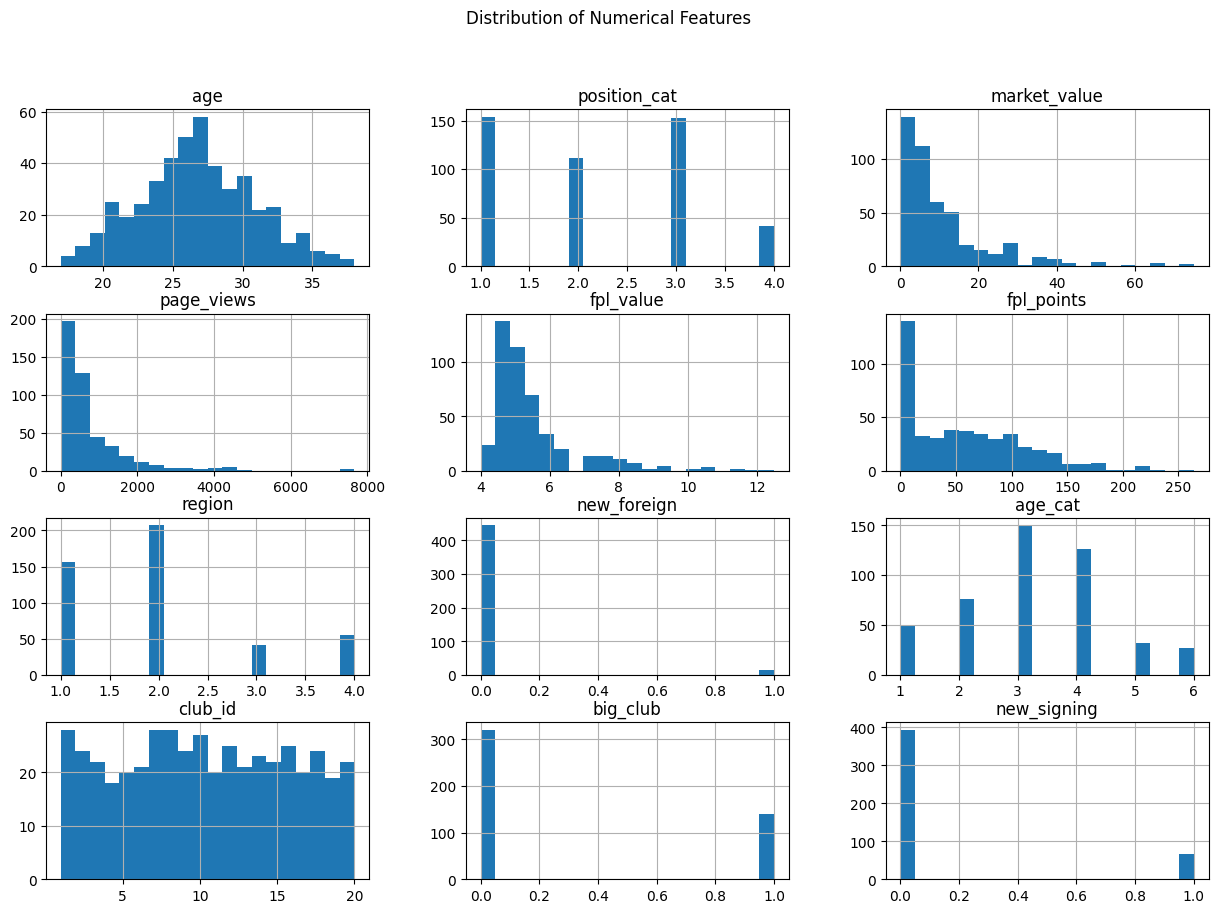

In [4]:

# Visualize the distribution of numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns
df[num_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

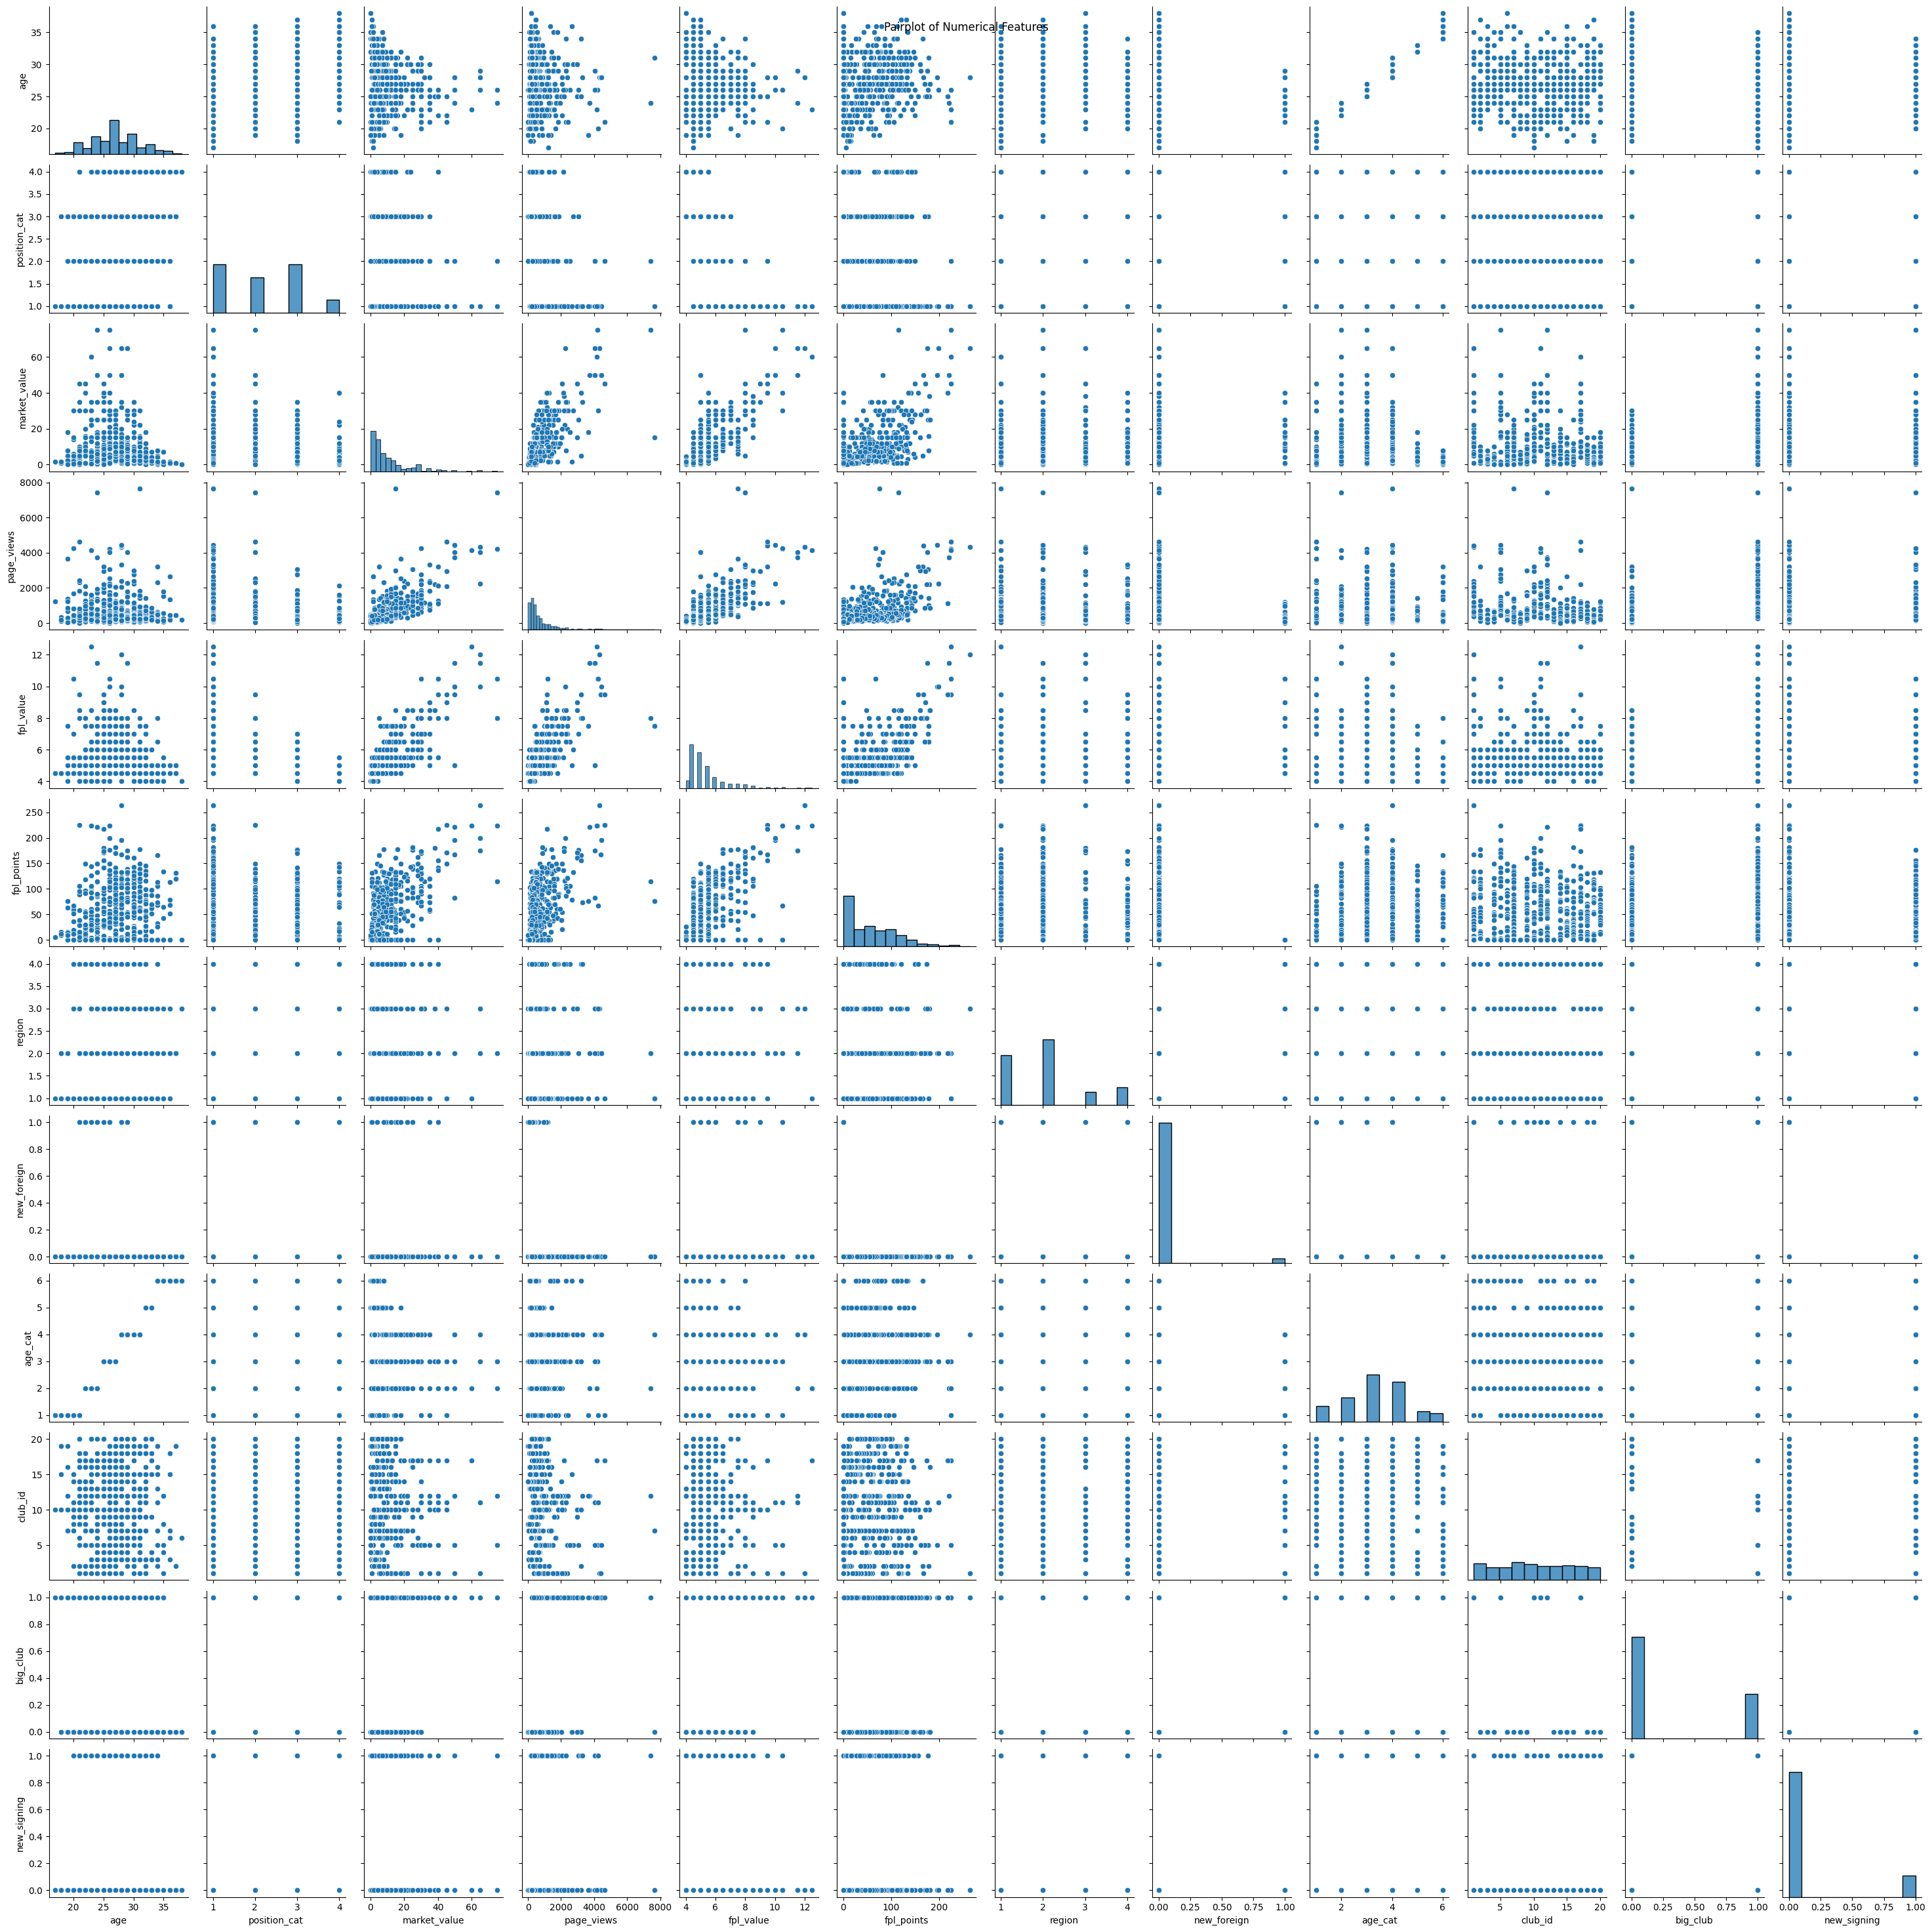

In [5]:

# Visualize relationships between numerical features
sns.pairplot(df[num_features])
plt.suptitle("Pairplot of Numerical Features")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


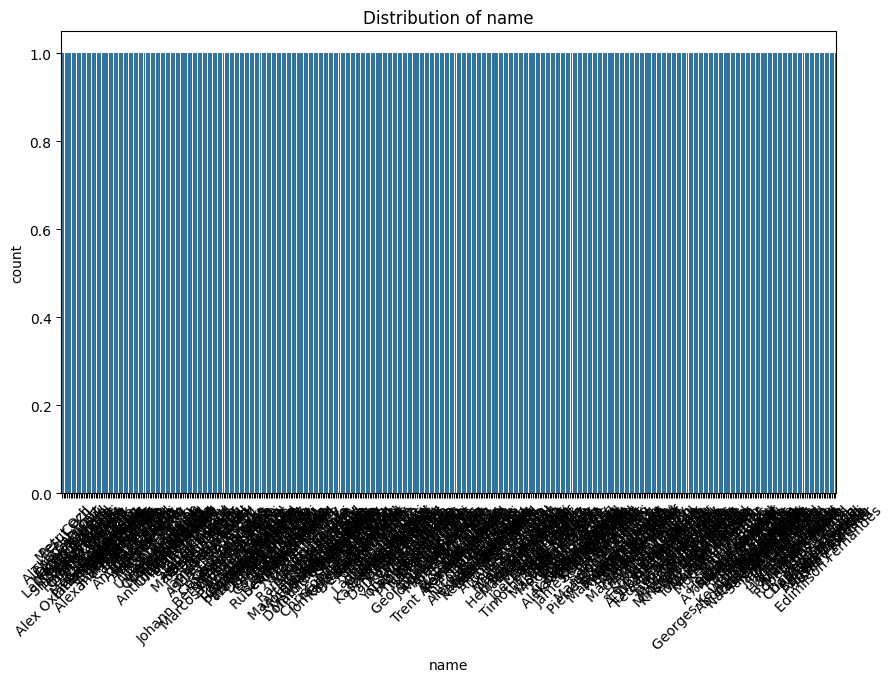

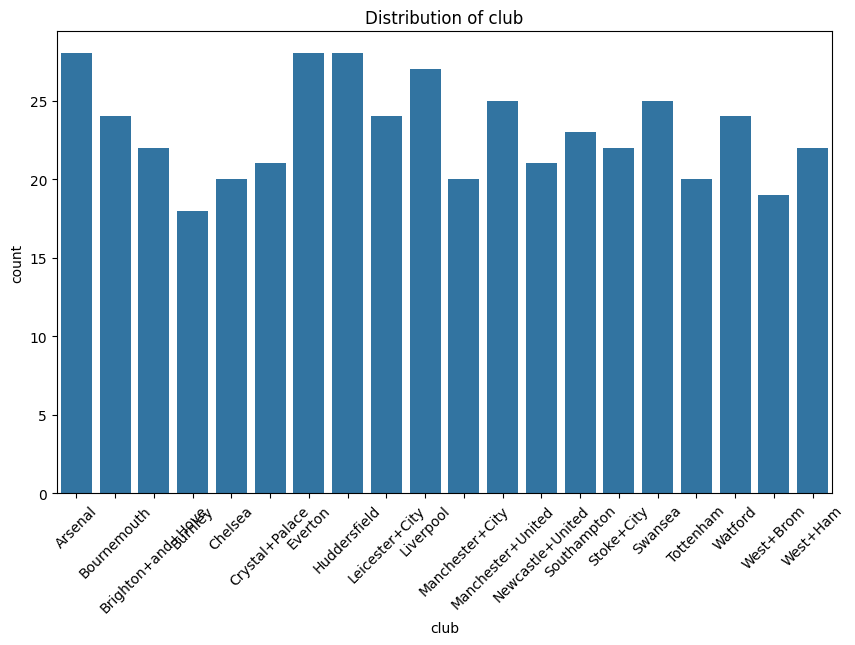

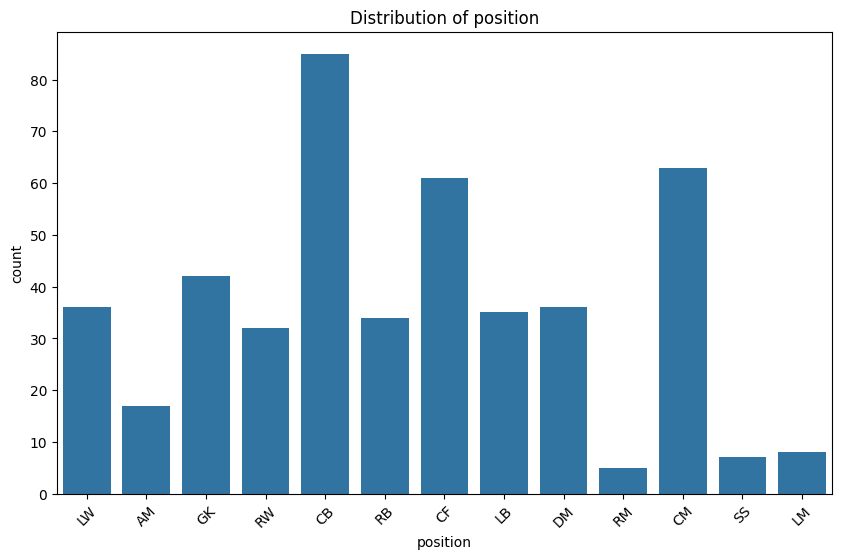

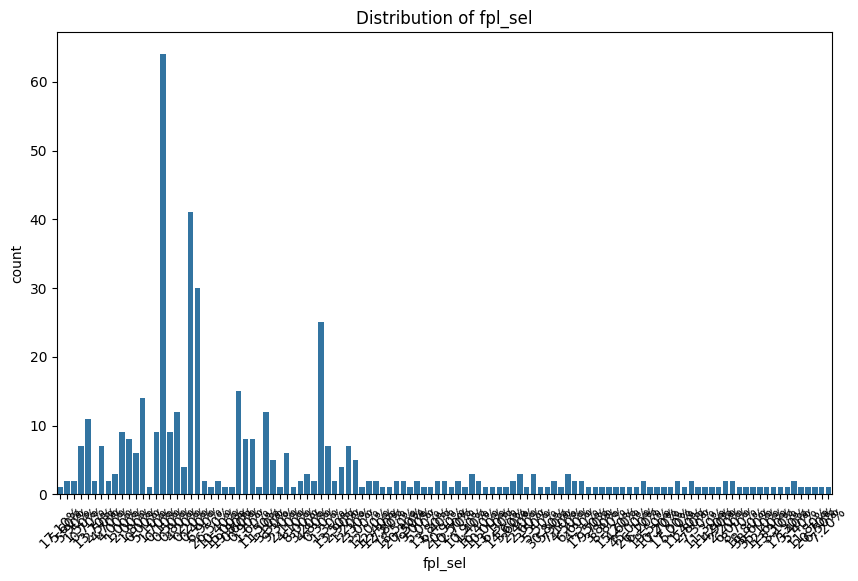

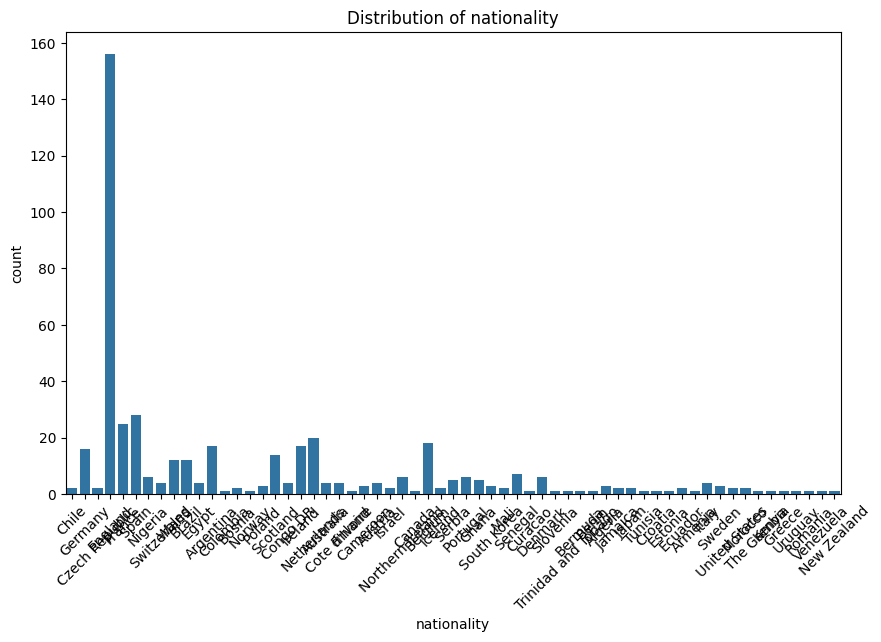

In [7]:

# Visualize categorical features
cat_features = df.select_dtypes(include=['object']).columns
for feature in cat_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)
    plt.show()


<ipython-input-8-7b6409f3fb17>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


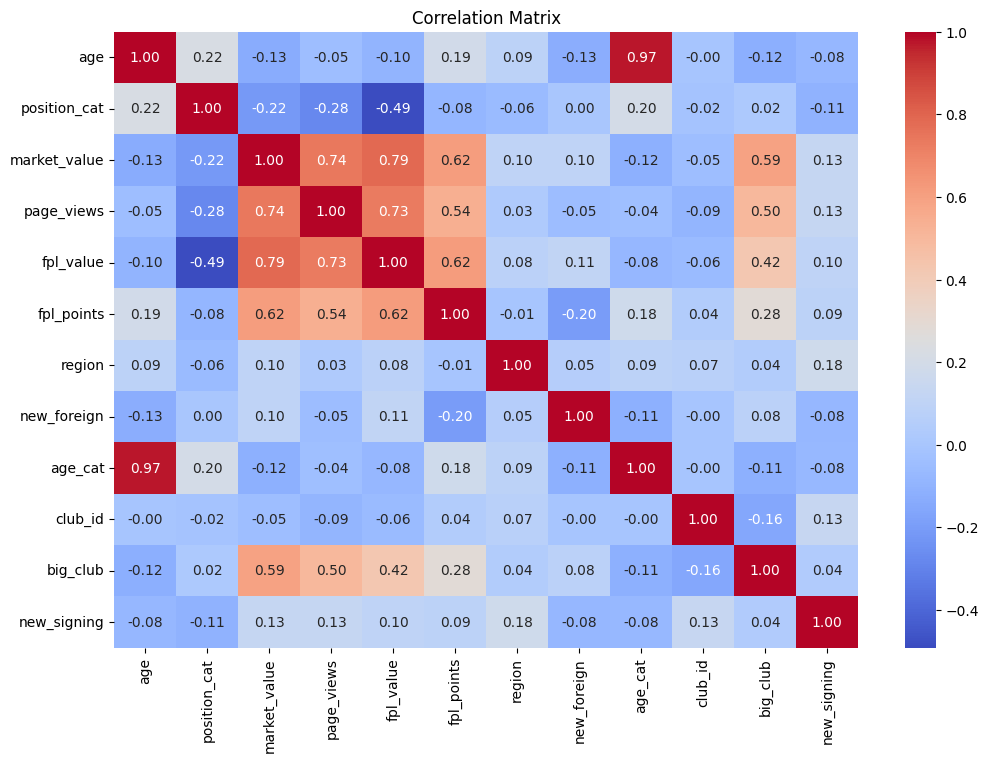

In [8]:

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## predict the 'market_value' based on 'page_views' using linear regression,

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
#df = pd.read_csv("football_players_dataset.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Prepare features and target variable
X = df[['page_views']]  # Feature: page_views
y = df['market_value']   # Target: market_value

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 43.81508915370927
R^2 Score: 0.7605205994900168


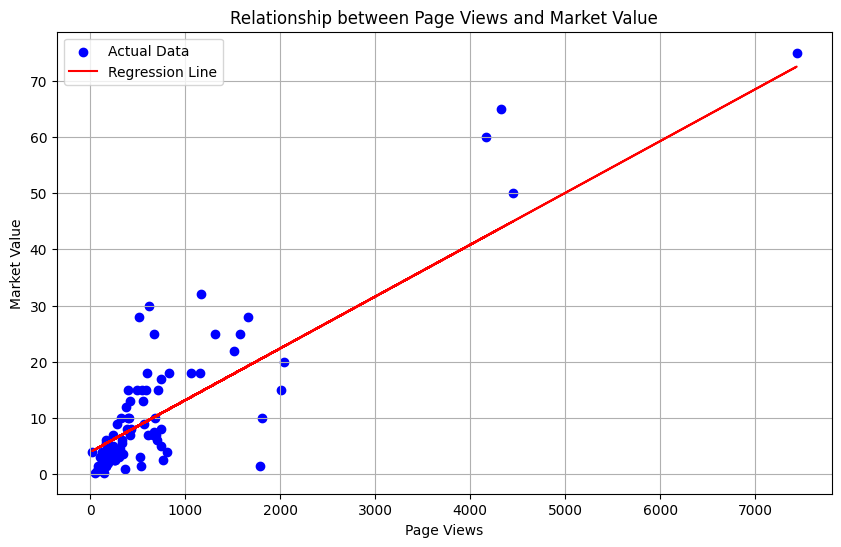

In [10]:
import matplotlib.pyplot as plt

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

plt.title('Relationship between Page Views and Market Value')
plt.xlabel('Page Views')
plt.ylabel('Market Value')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Define a function for making inference
def make_inference(page_views):
    # Use the trained model to predict market_value for the given page_views
    market_value_prediction = model.predict([[page_views]])
    return market_value_prediction[0]

# Example inference
page_views = 3500  # Example page_views value
inferred_market_value = make_inference(page_views)
print("Inferred Market Value:", inferred_market_value)


Inferred Market Value: 36.212483666581036


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
